
### 금리_단기1년전차이

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'
       
28513
```

In [3]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance

In [4]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [5]:
df, df_test_y = module.file_load.load_current_version()

In [6]:
df['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [7]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [8]:
df[df['아파트명'] == '상봉듀오트리스'][['target','구', '동','아파트명','계약년월', '계약일', '층','건축년도', '좌표X', '좌표Y',  'nearest_subway_distance']]

,target,구,동,아파트명,계약년월,계약일,층,건축년도,좌표X,좌표Y,nearest_subway_distance
93693,70000.0,중랑구,상봉동,상봉듀오트리스,201801,18,20,2016,127.092204,37.597362,220
93694,75000.0,중랑구,상봉동,상봉듀오트리스,201802,9,24,2016,127.092204,37.597362,220
93695,68000.0,중랑구,상봉동,상봉듀오트리스,201802,28,19,2016,127.092204,37.597362,220
93696,69500.0,중랑구,상봉동,상봉듀오트리스,201803,2,8,2016,127.092204,37.597362,220
93697,68000.0,중랑구,상봉동,상봉듀오트리스,201803,4,7,2016,127.092204,37.597362,220
...,...,...,...,...,...,...,...,...,...,...,...
622133,66500.0,중랑구,상봉동,상봉듀오트리스,201605,31,20,2016,127.092204,37.597362,220
622134,68080.0,중랑구,상봉동,상봉듀오트리스,201606,3,31,2016,127.092204,37.597362,220
622135,94908.0,중랑구,상봉동,상봉듀오트리스,201606,14,31,2016,127.092204,37.597362,220
3419,NaN,중랑구,상봉동,상봉듀오트리스,202212,25,27,2016,127.092204,37.597362,220


In [9]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구',  '본번', '부번', 
      '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
    
       '사용허가여부', '관리비 업로드','단지신청일', 
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분',  '층_그룹', '평수_그룹', '시',
        'nearest_park_distance',
    '가까운공원이름', 
        '공원생활권점수',
        '산책로갯수',
        '산책로총길이',
        '산책생활권점수',
        '생태문화길갯수',
        '생태문화길총길이',
        '생태문화생활권점수',
        '한강지천길갯수',
        '한강지천길총길이',
        '숲세권종합점수',
        '숲세권등급',
        '한강거리',
        '지가지수',
        '아파트전세_전기대비증감률',
        '실업률',
        '민간소비',
        '소비자심리지수',
        '경제심리지수',
        '여수신 금리차',
        '계약일',
        '전용면적(㎡)',
        '공원갯수',
        '공원총면적',
        '한강지천생활권점수'
]

# 전처리

In [10]:
df_select = module.preprocess.drop_columns(df, drop_columns)

In [11]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test'],
      dtype='object')

In [12]:
module.preprocess.번지_본번_부번_결측채우기(df_select)

# 파생변수

In [13]:
gangnam_8_schools = ['강남구', '서초구', '송파구']
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

In [14]:
final_drop_columns = ['구']
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [15]:
model_data = df_select.copy()

In [16]:
model_data.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'],
      dtype='object')

In [17]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

(1097155, 16) (5607, 16)


## Model Training


# 훈련데이터 분할

In [18]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [19]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((877724, 15), (219431, 15), (877724,), (219431,))

In [20]:
X_train.head(1)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군
586784,1444,3131,201605,11,1988,4922,127.015602,37.498732,-0.25,24,151,1404,18.501546,1612,1


In [21]:
X_test = dt_test.drop(['target'], axis=1)

# LGBMRegressor 모델 선언 시 파라미터 추가
lgbr = lgb.LGBMRegressor(
    boosting_type='dart',  # 부스팅 타입 (기본값: 'gbdt')
    num_leaves=258,         # 리프 노드의 최대 개수 (기본값: 31)
    max_depth=8,          # 트리의 최대 깊이 (-1은 제한 없음)
    learning_rate=0.07224290084064122,     # 학습률 (기본값: 0.1)
    n_estimators=301,      # 부스팅 반복 횟수 (기본값: 100)
    min_child_samples=5,  # 자식 노드를 분할하기 위한 최소 데이터 수 (기본값: 20)
    subsample=0.9773487107075421,         # 데이터 샘플링 비율 (기본값: 1.0)
    colsample_bytree=0.9011817947068029,  # 트리 생성 시 feature 샘플링 비율 (기본값: 1.0)
    reg_alpha=0.04063525938772354,
    reg_lambda=0.0014482851327836004,
    random_state=42        # 랜덤 시드
)

# 모델 학습
lgbr.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2659
[LightGBM] [Info] Number of data points in the train set: 877724, number of used features: 15
[LightGBM] [Info] Start training from score 57146.085207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(boosting_type='dart', colsample_bytree=0.9011817947068029,
              learning_rate=0.07224290084064122, max_depth=8,
              min_child_samples=5, n_estimators=301, num_leaves=258,
              random_state=42, reg_alpha=0.04063525938772354,
              reg_lambda=0.0014482851327836004, subsample=0.9773487107075421)

In [41]:
model = lgbr

In [31]:
# 검증 데이터로 예측
real_test_pred = lgbr.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')

RMSE test: 22522.447464776706


In [32]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 15), (5607,), (5607, 1))

In [33]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [34]:
X_val = X_test.reset_index(drop=True)
X_val

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군
0,1678,327,202301,10,1983,4465,127.068028,37.487802,2.25,22,8,1200,0.000000,1661,1
1,1665,328,202212,3,1983,471,127.072682,37.489122,2.25,25,8,1199,45.380282,1731,1
2,1665,328,202301,10,1983,471,127.072682,37.489122,2.50,25,8,1199,45.380282,1731,1
3,728,1933,202210,7,2019,4978,127.064151,37.480049,1.75,18,8,250,117.916314,1691,1
4,728,1933,202212,8,2019,4978,127.064151,37.480049,2.25,25,8,250,117.916314,1691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,202207,4,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5603,3322,36,202207,6,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5604,3322,36,202207,7,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5605,3322,36,202209,4,2021,5352,126.891951,37.584794,1.75,25,163,181,0.000000,747,0


In [35]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [50]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(1000)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(1000)       # 예측을 잘한 top 100개의 data

In [51]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [60]:
error_top100.to_csv('7_hyperparameter_lgbm_error.csv', index=False)
best_top100.to_csv('7_hyperparameter_lgbm_top.csv', index=False)

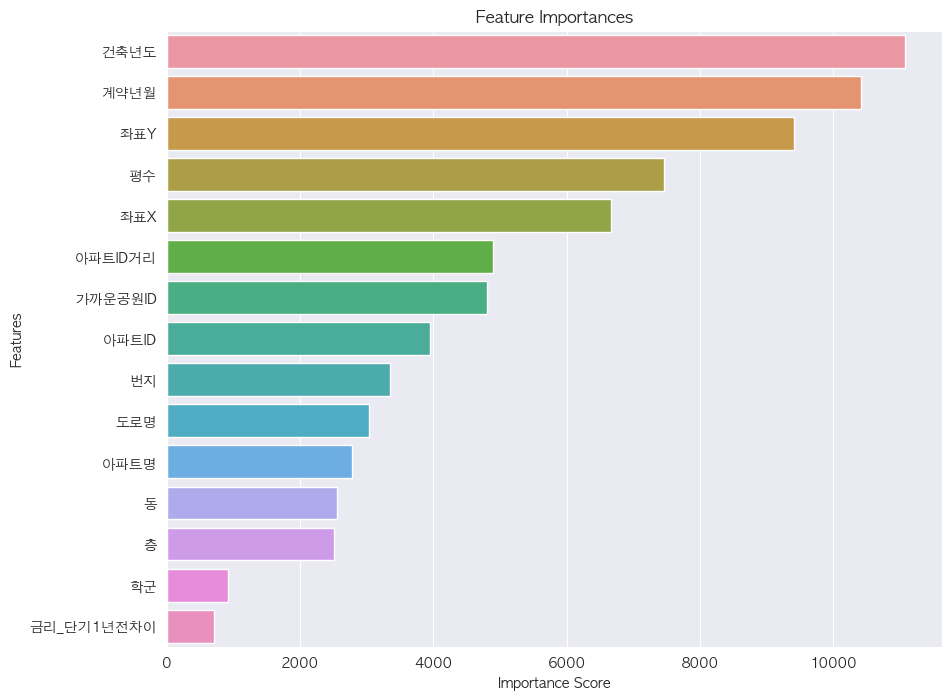

In [53]:
# Feature Importances 추출 및 정렬
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

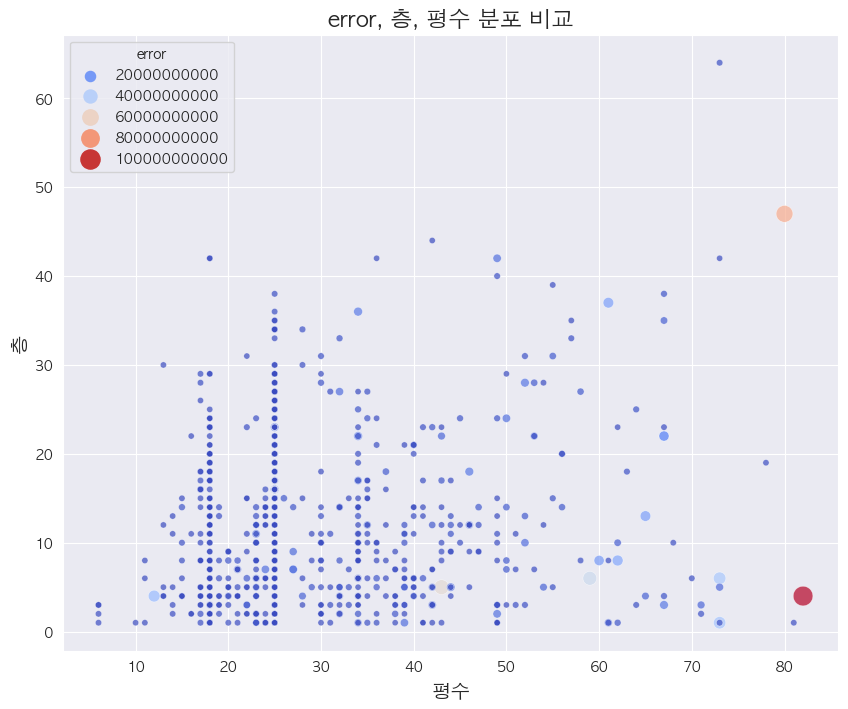

In [54]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [55]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
4     72
1     58
2     58
6     57
8     56
3     56
5     55
12    46
10    43
15    43
7     41
14    41
9     38
11    37
13    37
17    30
16    24
19    24
20    22
22    19
24    16
21    16
18    16
23    16
29    11
27    10
25     9
28     8
26     6
34     5
42     5
31     4
30     4
35     4
33     3
38     2
36     2
47     1
40     1
64     1
37     1
39     1
44     1
Name: count, dtype: int64
평수
25    432
18    109
34     42
23     35
17     26
     ... 
78      1
26      1
10      1
59      1
82      1
Name: count, Length: 65, dtype: int64


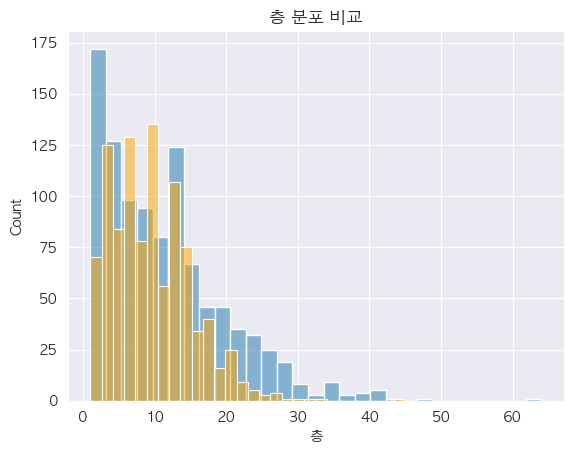

In [56]:
sns.histplot(data = error_top100, x='층', alpha=0.5)
sns.histplot(data = best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

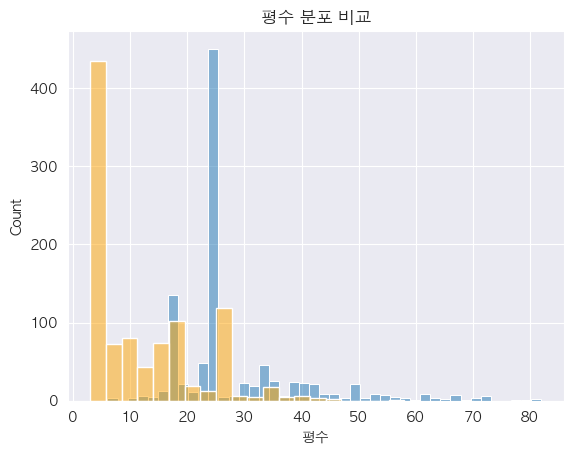

In [57]:
sns.histplot(data = error_top100, x='평수', alpha=0.5)
sns.histplot(data = best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [58]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군,target,pred,예측차이,error
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,2.25,82,서초동,A13784102,391.153802,P02373,1,640000.0,3.150271e+05,324972.903976,1.056074e+11
4881,685-700,아크로서울포레스트,202209,47,2020,왕십리로 83-21,127.043847,37.544464,1.75,80,성수동1가,A10024503,33.425547,P00357,0,1300000.0,1.027306e+06,272694.149177,7.436210e+10
3650,510-11,강남상가,202208,5,1974,압구정로2길 46,127.020669,37.518772,1.75,43,신사동,A10024029,170.244626,P02521,1,129500.0,3.653232e+05,-235823.197525,5.561258e+10
3679,369-1,현대1차,202207,6,1976,압구정로29길 71,127.027926,37.533027,1.25,59,압구정동,A13589802,23.804947,P02575,1,800000.0,5.834072e+05,216592.792807,4.691244e+10
3633,193-1,힐데스하임빌라,202207,6,1998,남부순환로377길 26,127.045027,37.488125,1.75,73,도곡동,A13527004,138.420534,P02556,1,500000.0,3.097611e+05,190238.909496,3.619084e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,19,잠실엘스,202212,15,2008,올림픽로 99,127.088451,37.512752,2.25,18,잠실동,A13822003,16.107253,P02693,1,160500.0,1.854358e+05,-24935.815836,6.217949e+08
5436,82,현대,202207,5,2000,통일로 246-20,126.961060,37.575631,1.75,34,무악동,A11081503,87.085521,P00082,0,150000.0,1.250828e+05,24917.153041,6.208645e+08
2694,514,잠실올림픽공원아이파크,202301,31,2019,올림픽로43길 34,127.114316,37.525544,2.25,22,풍납동,A10025185,0.000000,P02666,1,147000.0,1.719085e+05,-24908.476011,6.204322e+08
2815,27,주공,202212,13,1978,송파대로 567,127.092982,37.514368,2.25,24,잠실동,A13879102,2.189487,P02668,1,234600.0,2.595041e+05,-24904.121875,6.202153e+08


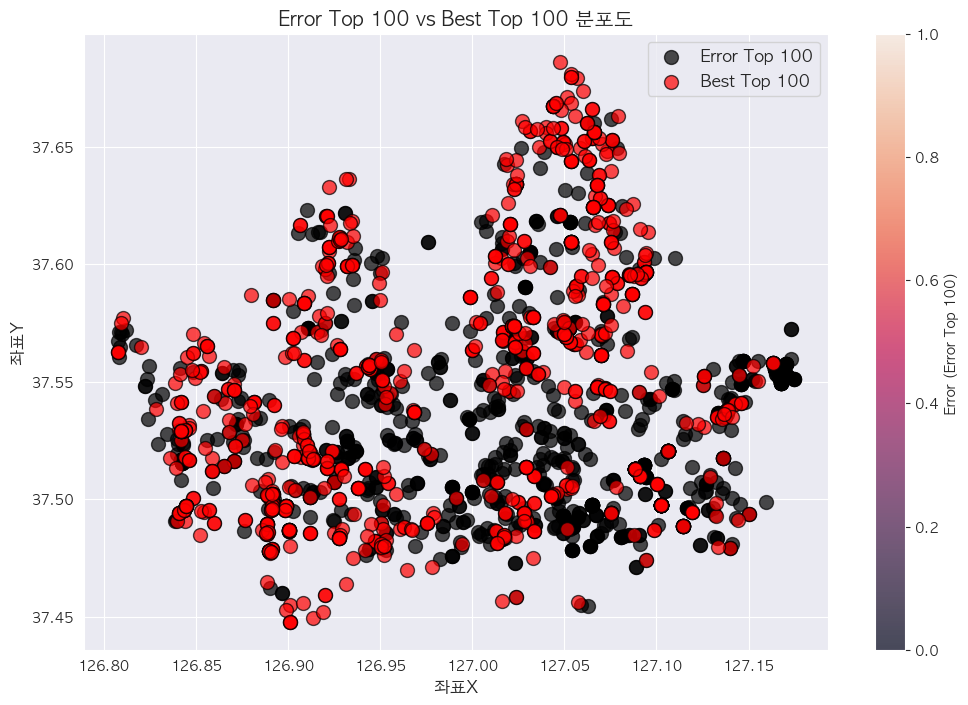

In [59]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'], 
    c='black',  s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'], 
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()